In [3]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

data_file = "data/quasar_train.csv"
data_train = np.genfromtxt(data_file, delimiter=",")

# Remember to restart kernel periodically; global namespace can be polluted

[ 2.51339906e+00 -9.81122145e-04]
[[1.000e+00 1.150e+03]
 [1.000e+00 1.599e+03]]
[1.38510859 0.94458475]


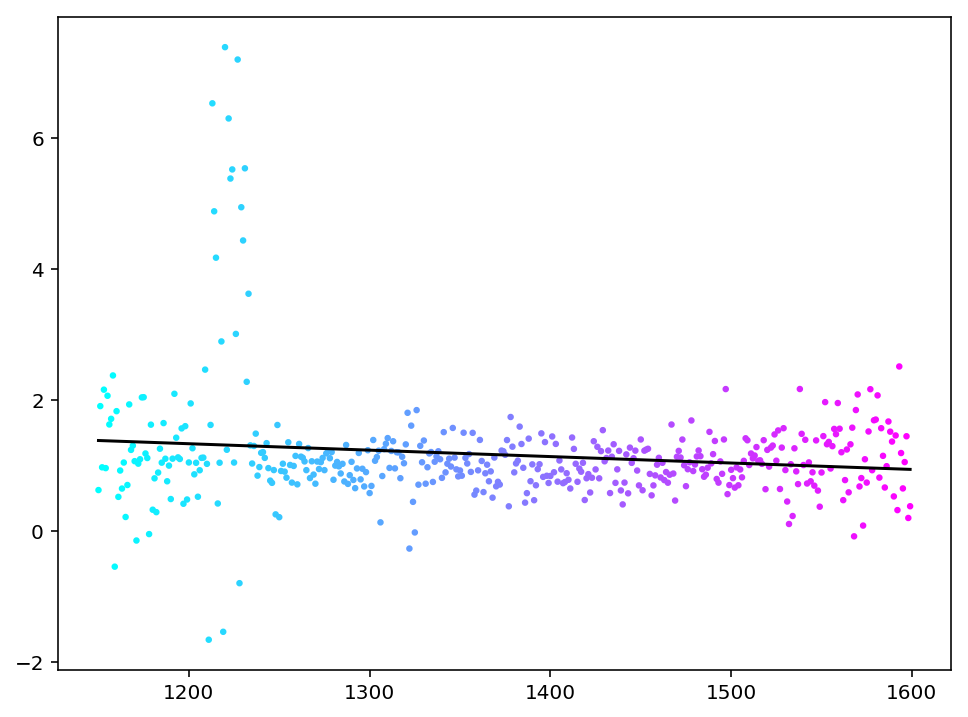

In [4]:
def fit_row_1(data_train):
    spectrum = data_train[0, :] # first row
    flux = data_train[1, :] # second row

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(spectrum, flux, s=5, c=spectrum, cmap='cool')

    # although this is the first training example, there are actually many x and y values
    # we can actually think of it as many training examples, modeling:
    # Ax + B = y 
    # where x is one value of lambda and y is the flux

    x = np.insert(spectrum.reshape(-1, 1), 0, values=1, axis=1)
    y = flux

    theta_pred = (np.linalg.pinv(x.T @ x) @ x.T) @ y
    print(theta_pred)

    line_x = np.asarray([spectrum[0], spectrum[-1]]).reshape(-1, 1)
    print(np.insert(line_x, 0, values=1, axis=1))
    line_y = np.insert(line_x, 0, values=1, axis=1) @ theta_pred
    
    print(line_y)
    ax.plot(line_x, line_y, c='black')
fit_row_1(data_train)

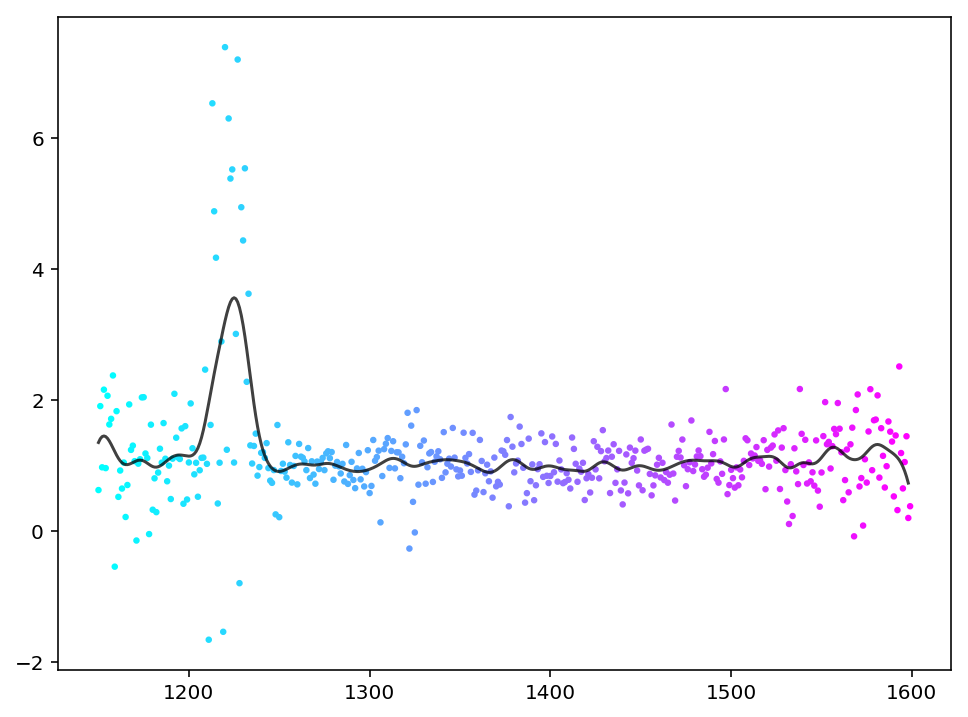

In [8]:
def get_weights(x_eval, X, tau):
    # tau = bandwidth param
    x_full = np.full(X.shape, x_eval)[:,1:]
    weights = np.exp(-((X[:,1:] - x_full) ** 2) / (2 * (tau**2)))
    W = np.diag(weights[:,0])
    return W
    
    
def fit_pt_weighted(x_eval, X, y, tau):
    W = get_weights(x_eval, X, tau)
    theta_pred = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ y
    return theta_pred

def evaluate(theta_pred, x_eval):
    return np.asarray([1, x_eval]) @ theta_pred

def fit_row_1_weighted(data_train, taus=[5]):
    spectrum = data_train[0, :]
    flux = data_train[1, :]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(spectrum, flux, s=5, c=spectrum, cmap='cool')

    # x really should have been caps the first time round
    X = np.insert(spectrum.reshape(-1, 1), 0, values=1, axis=1)
    y = flux

    line_x = np.arange(spectrum[0], spectrum[-1])
    
    for t in taus:
        line_y = []
        for x_eval in line_x:
            theta_pred = fit_pt_weighted(x_eval, X, y, t)
            line_y.append(evaluate(theta_pred, x_eval))
        ax.plot(line_x, line_y, c='black', alpha=0.75)
    plt.show()

fit_row_1_weighted(data_train)

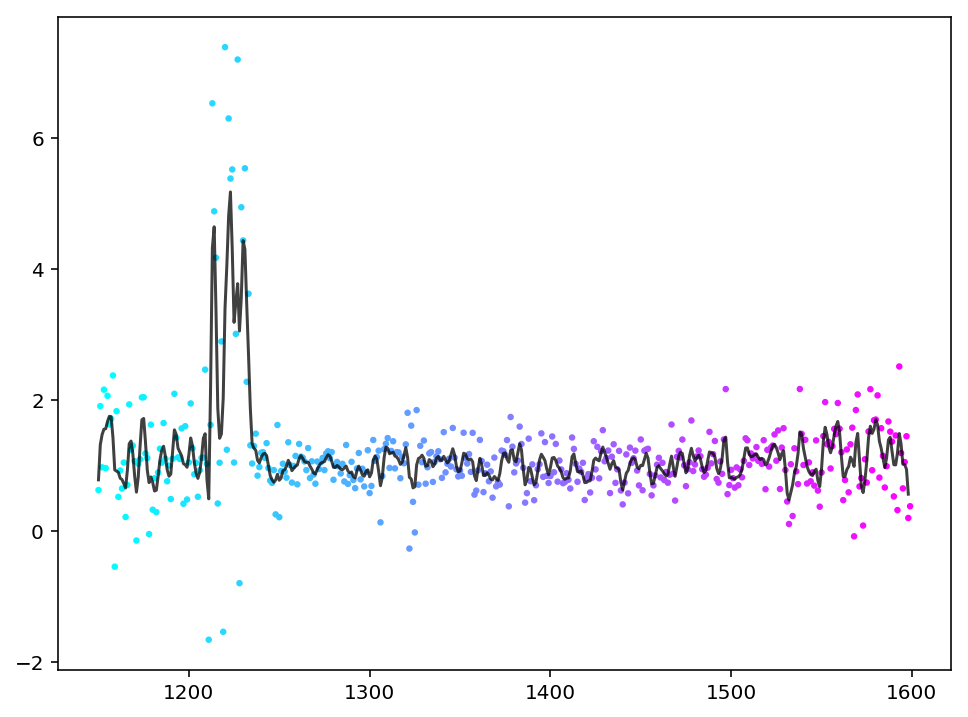

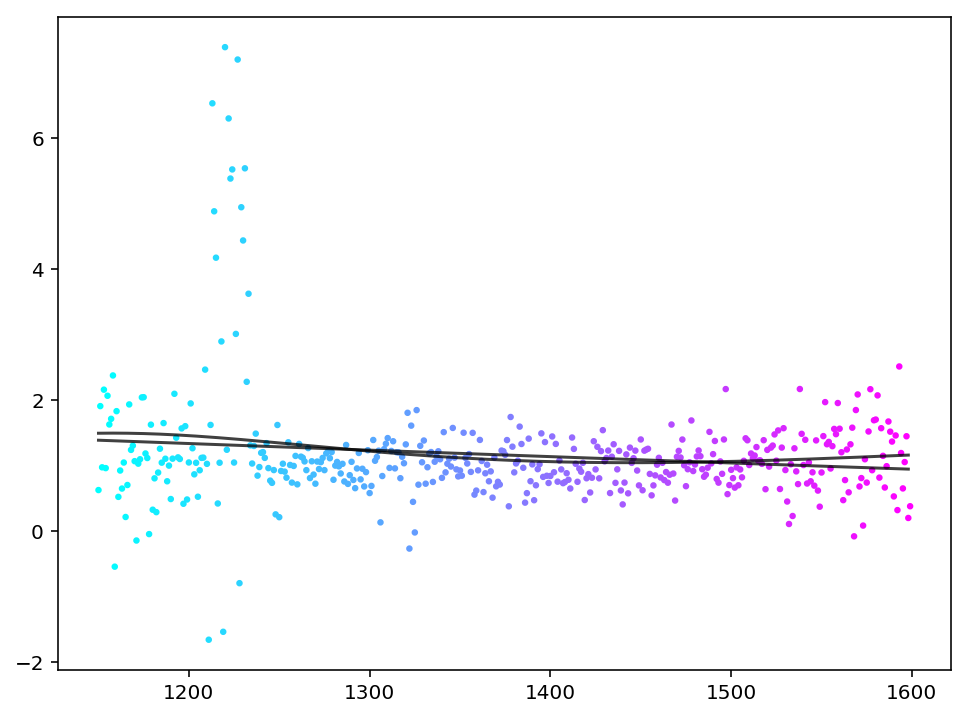

In [19]:
# Overfit:
fit_row_1_weighted(data_train, [1])

# Underfit:
fit_row_1_weighted(data_train, [100, 1000])